##**LINEAR REGRESSION PROJECT**

GOAL:-
An ecommerce company based in New York City that sells clothing online.The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

STEPS:-
1. Understand the customer data
2. Clean and Transform the data if needed.
3. Exploratory Data Analysis.
4. Training and Testing the model.
5. Predicting the test data.
7. Evaluating the model.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv('/content/Ecommerce Customers (1).csv')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,4.446308,599.406092


In [10]:
##Getting to know the columns
data.columns. values. tolist()

['Email',
 'Address',
 'Avatar',
 'Avg. Session Length',
 'Time on App',
 'Length of Membership',
 'Yearly Amount Spent']

In [11]:
##Dropping unnecessary column
data.drop(['Email'], axis=1)

,Address,Avatar,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,4.082621,587.951054
1,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,2.664034,392.204933
2,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,4.104543,487.547505
3,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,3.120179,581.852344
4,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,4.446308,599.406092
...,...,...,...,...,...,...
496,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,3.576526,6000.000000
497,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,4.958264,551.620146
498,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,2.336485,456.469510
499,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,2.735160,497.778642


##**Locating missing data**
Next, we are going to use a secret Python hack known as ‘isnull function’ to discover our data. Actually a common function, 'isnull' helps us find where in our dataset there are missing values. This is useful information as this is what we need to correct while data cleaning.

output result is a list of boolean values. 

There are several insights the list can give us. First and foremost is where the missing data is – any ‘True’ reading under a column indicates missing data in that column’s category for that data file.

In [12]:
data.isnull()

,Email,Address,Avatar,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
496,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False
499,False,False,False,False,False,False,False


##We now summarise the missing data by using data.isnull().sum()

In [13]:
data.isnull().sum()


Email                   2
Address                 8
Avatar                  5
Avg. Session Length     0
Time on App             0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

From here, we use code to actually clean the data. This boils down to two basic options. 

1) Drop the data or, 

2) Input missing data. 

If you opt to:
1. Drop the data
You’ll have to make another decision – whether to drop only the missing values and keep the data in the set, or to eliminate the feature (the entire column) email,address and avatar(also this features seems not so important) because there are so many missing datapoints that it isn’t fit for analysis. If you want to drop the missing values you’ll have to go in and mark them void according to Pandas or NumBy standards (see section below). But if you want to drop the entire column, here’s the code:



In [14]:
data.drop(['Email','Address','Avatar'], axis=1)

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,4.082621,587.951054
1,31.926272,11.109461,2.664034,392.204933
2,33.000915,11.330278,4.104543,487.547505
3,34.305557,13.717514,3.120179,581.852344
4,33.330673,12.795189,4.446308,599.406092
...,...,...,...,...
496,34.702529,11.695736,3.576526,6000.000000
497,32.646777,11.499409,4.958264,551.620146
498,33.322501,12.391423,2.336485,456.469510
499,33.715981,12.418808,2.735160,497.778642


In [15]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
496    False
497    False
498    False
499    False
500    False
Length: 501, dtype: bool

Aka a list of boolean values where a ‘True’ reading indicated duplicate values.

Let’s go and get ahead and get rid of that duplicate

In [16]:
Final_Data1 = data.drop_duplicates()
print(Final_Data1)

                             Email  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   
500                         Gummar   

                                               Address            Avatar  \
0         835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1       4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3     1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
..                                                 ...               ...   
496  172 Ow

And there we have it, our dataset with our duplicate removed. Onwards.

5. Detect Outliers
Outliers are numerical values that lie significantly outside of the statistical norm. Cutting that down from unnecessary science garble – they are data points that are so out of range they are likely misreads. 

They, like duplicates, need to be removed. Let’s sniff out an outlier by first, pulling up our dataset.

In [17]:
Final_Data1['Yearly Amount Spent'].describe()

count     501.000000
mean      510.256551
std       258.208930
min       256.670582
25%       445.062185
50%       499.140152
75%       549.860590
max      6000.000000
Name: Yearly Amount Spent, dtype: float64

Take a look at that ‘max’ value - none of the other values are even close to 6000, with the mean (the average) being 510. Now, your solution to outliers will depend on your knowledge of your dataset. In this case, the data scientists who input the knowledge know that they meant to put a value of 510 not 6000. So, we can safely remove the outlier to fix our data.

Thus the outlier is taken care as show below:

In [18]:
for i in range(501):
    if data.loc[i,'Yearly Amount Spent'] == 6000:
        a = i
        Final_Data1.loc[a,'Yearly Amount Spent'] = 510.25
        
        

        

In [19]:
Final_Data2 = Final_Data1.drop(['Email','Address','Avatar'], axis=1)
Final_Data2

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,4.082621,587.951054
1,31.926272,11.109461,2.664034,392.204933
2,33.000915,11.330278,4.104543,487.547505
3,34.305557,13.717514,3.120179,581.852344
4,33.330673,12.795189,4.446308,599.406092
...,...,...,...,...
496,34.702529,11.695736,3.576526,510.250000
497,32.646777,11.499409,4.958264,551.620146
498,33.322501,12.391423,2.336485,456.469510
499,33.715981,12.418808,2.735160,497.778642


Let's explore these types of relationships across the entire data set using pairplots

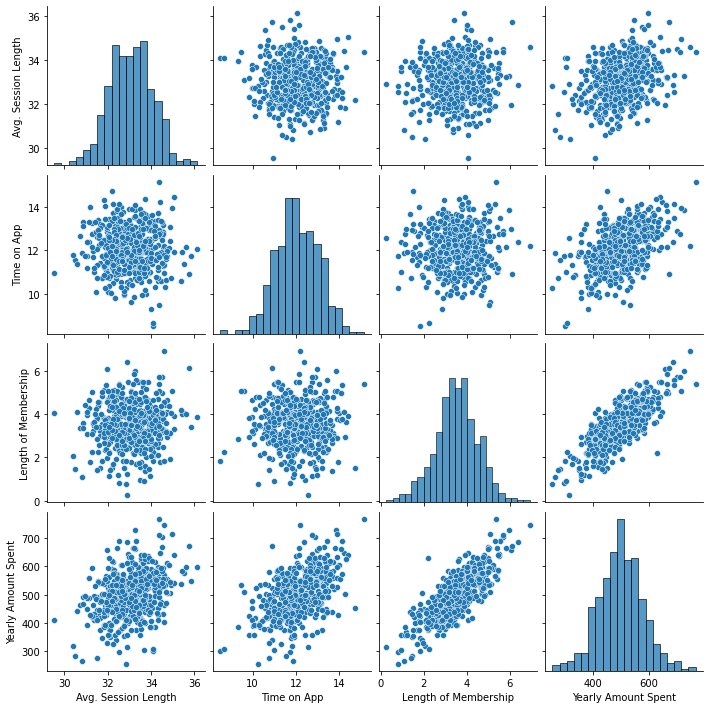

In [20]:
sns.pairplot(Final_Data2)

From above plots we can visually say that some of the variables are highly correlated. to understand the degree of correlation, let is compute correlation matrix for our data.

In [21]:
matrix = Final_Data2.corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
                      Avg. Session Length  Time on App  Length of Membership  \
Avg. Session Length              1.000000    -0.027357              0.067363   
Time on App                     -0.027357     1.000000              0.026309   
Length of Membership             0.067363     0.026309              1.000000   
Yearly Amount Spent              0.354155     0.499236              0.799513   

                      Yearly Amount Spent  
Avg. Session Length              0.354155  
Time on App                      0.499236  
Length of Membership             0.799513  
Yearly Amount Spent              1.000000  


Length of membership is the most correlated variable with the yearly amount spent

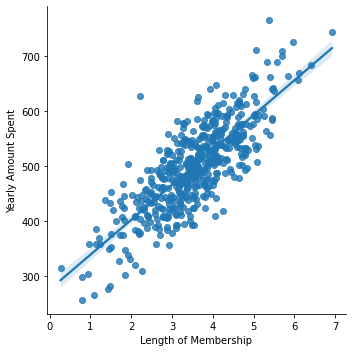

In [24]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data=Final_Data2)

**Training and Testing Data**:-

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.

In [27]:
X = Final_Data2[['Avg. Session Length', 'Time on App', 'Length of Membership']]
Y = Final_Data2['Yearly Amount Spent']

Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

**Training the Model:-**

Now its time to train our model on our training data!..Import LinearRegression from sklearn.linear_model

In [30]:
from sklearn.linear_model import LinearRegression

Create an instance of a LinearRegression() model named lm.

In [31]:
lm = LinearRegression()

Train/fit lm on the training data.

In [32]:
lm.fit(X_train, Y_train )

LinearRegression()

Print out the coefficients of the model

In [33]:
print(lm.coef_)

[25.44786946 38.85260935 60.35137368]


**Predicting Test Data:-**

Now that we have fit our model, let's evaluate its performance by predicting off the test values!..

Use lm.predict() to predict off the X_test set of the data.

In [34]:
predictions = lm.predict(X_test)

Create a scatterplot of the real test values versus the predicted values.

Text(0.5, 0, 'Y test')

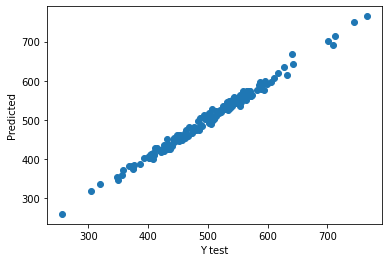

In [36]:
import matplotlib as plt
plt.pyplot.scatter(Y_test, predictions)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Y test')

**Evaluating the Model:-**

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. 

In [38]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(Y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(Y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_test, predictions))))

MAE: 7.145574275631522
MSE: 76.77752252028621
RMSE: 8.762278386372246


**Residuals:-**

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

Therefore we plot histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

<ipython-input-39-877c35130351>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-predictions))


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

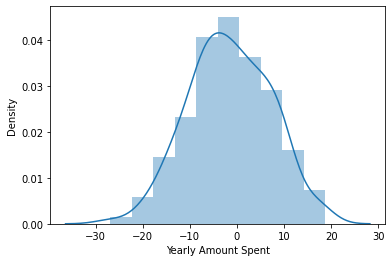

In [39]:
sns.distplot((Y_test-predictions))

**Conclusion:-**

We still want to figure out the answer to the original question, do we focus our efforst on mobile app? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

Recreate the dataframe below.

In [40]:
pd.DataFrame(lm.coef_ , X.columns, columns=['Coeffecient'])

,Coeffecient
Avg. Session Length,25.447869
Time on App,38.852609
Length of Membership,60.351374


**Interpreting these coefficients?**

The greater the value the more related it is to the target, in this case yearly amount spent